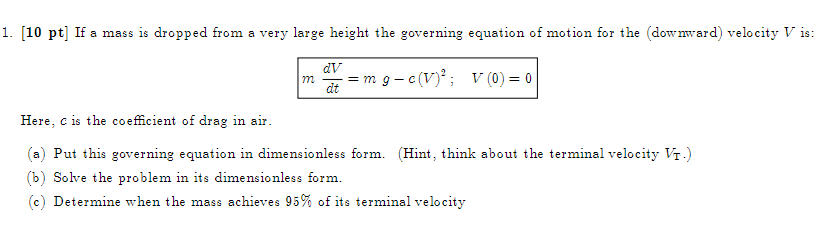

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def model(v):
    dvdt = 1 - v**2
    return dvdt

def rk4(v, t, dt):
    k1 = dt * model(v)
    k2 = dt * model(v + 0.5 * k1)
    k3 = dt * model(v + 0.5 * k2)
    k4 = dt * model(v + k3)
    
    v_new = v + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    return v_new

t = np.linspace(0, 10, 5000)
dt = t[1] - t[0]

v = np.zeros_like(t)
v[0] = 0

for i in range(1, len(t)):
    v[i] = rk4(v[i-1], t[i-1], dt)

# Handle for v=0.95
indices_95 = np.where(v >= 0.95)[0]
if indices_95.size > 0:
    idx_95 = indices_95[0]
    time_95 = t[idx_95]
    print(f"Velocity reaches 95% at {time_95:.2f} non-dimensional units.")
else:
    idx_95 = None
    time_95 = None

# Handle for v=1 (terminal velocity)
indices_1 = np.where(v >= 0.999999)[0]
if indices_1.size > 0:
    idx_1 = indices_1[0]
    time_1 = t[idx_1]
    print(f"Velocity reaches terminal velocity at {time_1:.2f} non-dimensional units.")
else:
    idx_1 = None
    time_1 = None


Velocity reaches 95% at 1.83 non-dimensional units.
Velocity reaches terminal velocity at 7.26 non-dimensional units.


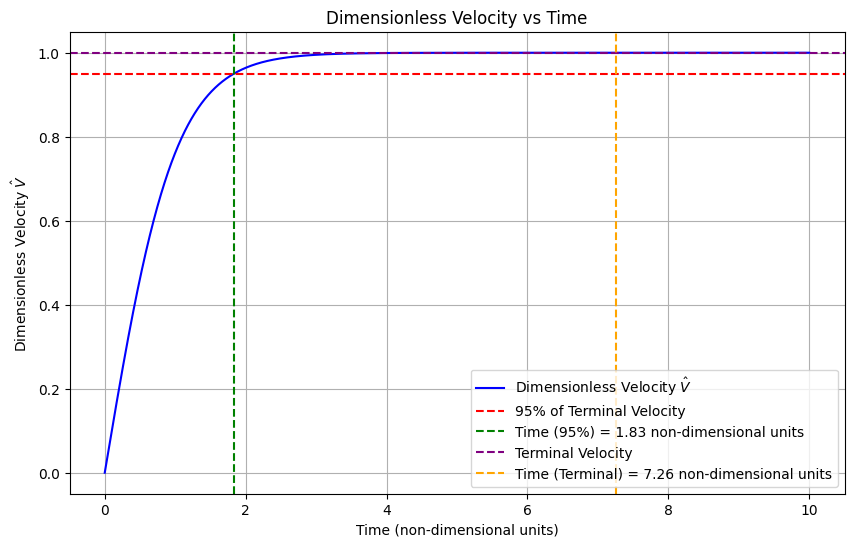

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(t, v, label=r"Dimensionless Velocity $\hat{V}$", color='blue')
if time_95:
    plt.axhline(0.95, color='red', linestyle='--', label="95% of Terminal Velocity")
    plt.axvline(time_95, color='green', linestyle='--', label=f"Time (95%) = {time_95:.2f} non-dimensional units")
if time_1:
    plt.axhline(1.0, color='purple', linestyle='--', label="Terminal Velocity")
    plt.axvline(time_1, color='orange', linestyle='--', label=f"Time (Terminal) = {time_1:.2f} non-dimensional units")
plt.xlabel('Time (non-dimensional units)')
plt.ylabel('Dimensionless Velocity $\hat{V}$')
plt.title('Dimensionless Velocity vs Time')
plt.legend()
plt.grid(True)
plt.show()